# Convolutional and transformations / CNNs Design with pytorch.

CNN is for the image classifier problems where it works best for images classification problems.

**Concepts:**  Convolution is  a variation of dot product and where we take a dot product and repeat it over and over again on a signal.

**Convoluted:**  Excessively complicated and difficult to understand, like a bad sci-fi movie plot is called Convoluted.

**Convolved:**  Past Tense of convolve, which is a mathematical operation used in signal and image processing.

## Convolution in 1-Dimensional (Signals):

**Kernel (filter)-** filter we use in CNNs a smooth kernel, when we convolve a signal with kernel it smoothes the signal result but it depends upon the nature of the kernel.

``How does it work?``

The selected size of a kernel will get a multiplied with the signal from left to right and outputs the current convolution result, example:
Suppose the signal length is 4
Kernel size is 3
Just like sliding windows algorithm

For i: signal length 
	
    For k + i: k + kernel size

Compute dot product of kernel size and signal length of kernel size ignore others for next iteration.
Same for 2D and 3D images.

``Additionals:``

After applying Kernel the dot result will get fitted into a matrix of size (kernel + padding * 2) and so the outer part of the matrix is useless for further computation.

![SegmentLocal](imgs/kernel_cnns.gif "segment")

**figure 1: kernel size's 3 padding size's 1**

**Notes:**
1. Edges always cause difficulties. We deal with this through `padding`.
2. Image convolution in Deep learning also involves downsampling. This is done via `stride and pooling`.
3. N-kernels produces an N-layer result. These layers are called `Channels` but they are features not RGB.
4. Use odd kernel sizes (3, 5, 7, etc) to have an exact center.

**Feature maps:**

The result we get after applying kernel on an image is termed as feature map

**More about kernel**

In deep learning, kernels begin random and are learned through gradient descent. After learning, kernels are the same for all iamges. Using pre-trained kernels is called ``transfer learning``.

kernels are not used to classify to make decisions; they are used to extract features. Those features are used for classification.

``Feature maps are called channels (any kind) tensors(chans * heights * width)``

## Implementing CNNs in Code

In [1]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import torchvision
import torchvision.transforms as T
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset

### Manual 2d convolution in numpy/scipy

In [2]:
nimg = 49
image = np.random.randn(nimg, nimg)
kernel_size = 7
y, x = np.meshgrid(np.linspace(-3, 3, kernel_size), np.linspace(-3, 3, kernel_size))
kernel = np.exp(-(x ** 2 + y ** 2) / 7)

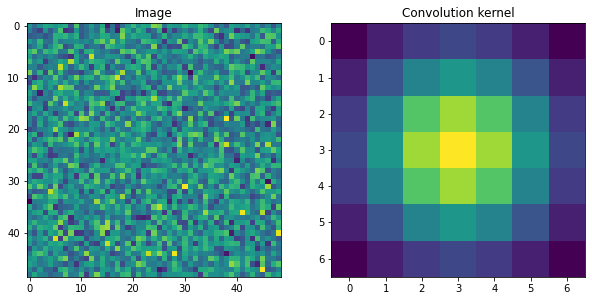

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(kernel)
ax[1].set_title("Convolution kernel");

In [4]:
cn_op = np.zeros((nimg, nimg))
kernel_size = 3
for i in range(kernel_size, nimg - kernel_size):
    for j in range(kernel_size, nimg - kernel_size):
        sample = image[i - kernel_size: i + kernel_size + 1, :]
        sample = sample[:, j - kernel_size: j + kernel_size + 1]
        dot_product = np.sum(sample * kernel[::-1, ::-1])
        cn_op[i, j] = dot_product

In [5]:
cn_op_2 = convolve2d(image, kernel, mode="valid")

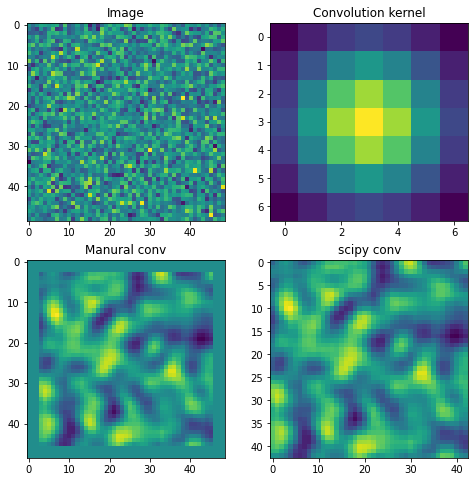

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(image)
ax[0, 0].set_title("Image")
ax[0, 1].imshow(kernel)
ax[0, 1].set_title("Convolution kernel")
ax[1, 0].imshow(cn_op)
ax[1, 0].set_title("Manural conv")
ax[1, 1].imshow(cn_op_2)
ax[1, 1].set_title("scipy conv");

### Examples of convolution with different kernels in a real image

(967, 1723, 3)


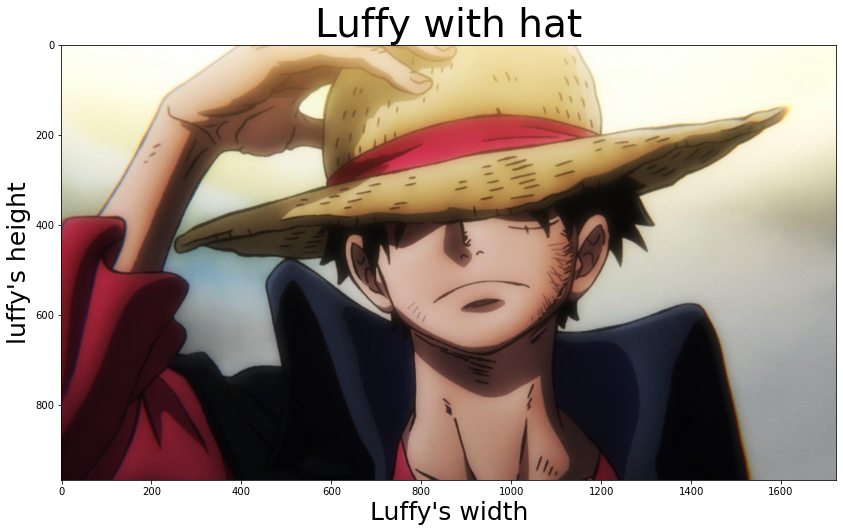

In [7]:
luffy = imread("data/luffy.jpg")

print(luffy.shape)

plt.figure(figsize=(15, 8))
plt.imshow(luffy)
plt.title("Luffy with hat", fontdict={"fontsize": 39})
plt.ylabel("luffy's height", fontdict={"fontsize": 25})
plt.xlabel("Luffy's width", fontdict={"fontsize": 25});

(967, 1723)


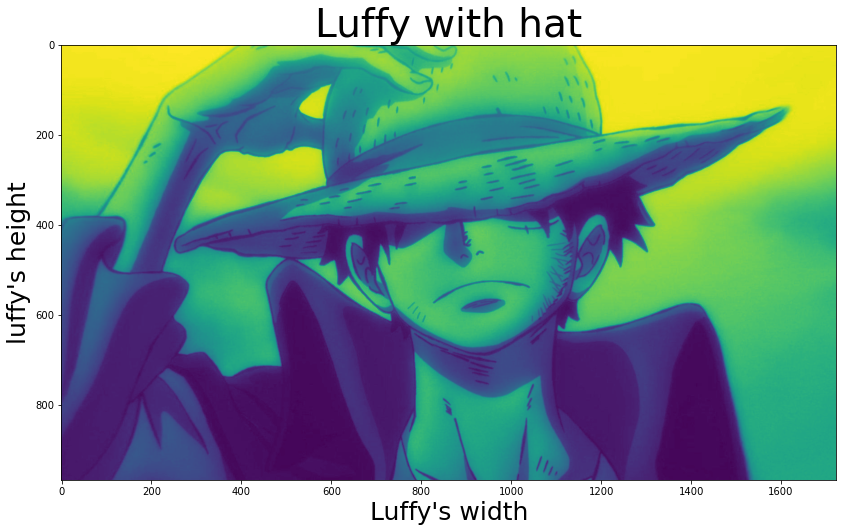

In [8]:
luffy = np.mean(luffy, axis=2)
luffy = luffy / np.max(luffy)

print(luffy.shape)

plt.figure(figsize=(15, 8))
plt.imshow(luffy)
plt.title("Luffy with hat", fontdict={"fontsize": 39})
plt.ylabel("luffy's height", fontdict={"fontsize": 25})
plt.xlabel("Luffy's width", fontdict={"fontsize": 25});

### Hand crafting vertical and horizontal kernels

In [9]:
vk = np.array([[1, 0, -1],
              [1, 0, -1],
              [1, 0, -1]])
hk = np.array([[1, 1, 1],
              [0, 0, 0],
              [-1, -1, -1]])

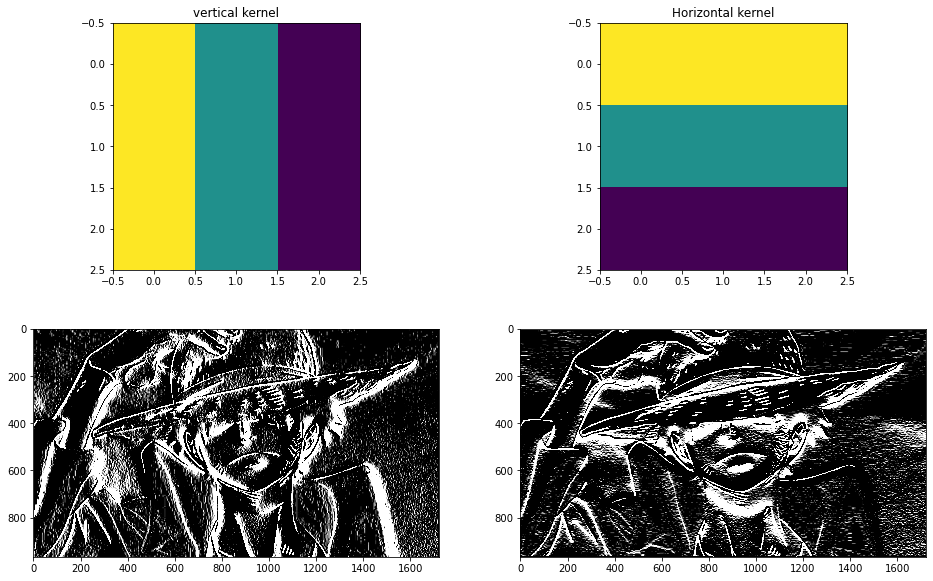

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax[0, 0].imshow(vk)
ax[0, 0].set_title("vertical kernel")
ax[0, 1].imshow(hk)
ax[0, 1].set_title("Horizontal kernel")

convers = convolve2d(luffy, vk, mode="same")
ax[1, 0].imshow(convers, cmap="gray", vmin=0, vmax=.01)

convers = convolve2d(luffy, hk, mode="same")
ax[1, 1].imshow(convers, cmap="gray", vmin=0, vmax=.01)
plt.show()

### Implementing conv in pytorch

In [11]:
vkt = torch.tensor(vk).view(1, 1, 3, 3).double()
hkt = torch.tensor(hk).view(1, 1, 3, 3).double()
luffy = torch.tensor(luffy).view(1, 1, luffy.shape[0], luffy.shape[1])
vkt.shape, luffy.shape

(torch.Size([1, 1, 3, 3]), torch.Size([1, 1, 967, 1723]))

In [12]:
conv = F.conv2d(luffy, vkt)
conv.shape

torch.Size([1, 1, 965, 1721])

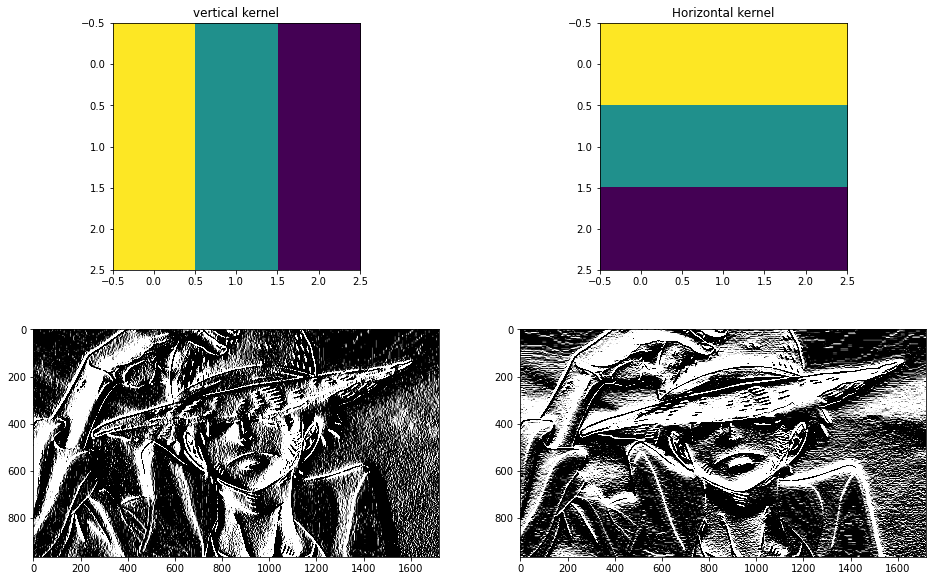

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax[0, 0].imshow(vk)
ax[0, 0].set_title("vertical kernel")
ax[0, 1].imshow(hk)
ax[0, 1].set_title("Horizontal kernel")

convers = F.conv2d(luffy, vkt)
img = torch.squeeze(convers.detach())
ax[1, 0].imshow(img, cmap="gray", vmin=0, vmax=.01)

convers = F.conv2d(luffy, hkt)
img = torch.squeeze(convers.detach())
ax[1, 1].imshow(img, cmap="gray", vmin=0, vmax=.01)
plt.show()

### Convolution parameters (stride, padding)

**Padding:**
Padding is used to increase the size of the result of convolution, and match with the previous layer (or image).
* Padding involves inserting 1 + rows and columns
* Adding rows/columns are symmetric!
* Padded numbers are usually zeros. It's also possible to wrap the image from the top-to-bottom (circular convolution).

**Stride:**
* It is used to decrease the size of the result of convolution. It's a mechanism of downsampling, and reduces the number of parameters in a CNN.
* The stride parameters (should have been called skip IMHO) is an integer. Stride=1 gives the full result
* Stride is usually the same for rows and columns, but can be different when warranted.

![SegmentLocal](imgs/formula.png "segment")


### Convolution2D class in pytorch

In [15]:
# Create a conv2d class instance with parameters

# parameters
inChans = 3
outChans = 15
kernel_size = 5
stride = 1
padding = 0

conv = nn.Conv2d(inChans, outChans, kernel_size=kernel_size, stride=stride,
                padding=padding)
print(conv)
print("size of weights:", conv.weight.shape)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
size of weights: torch.Size([15, 3, 5, 5])


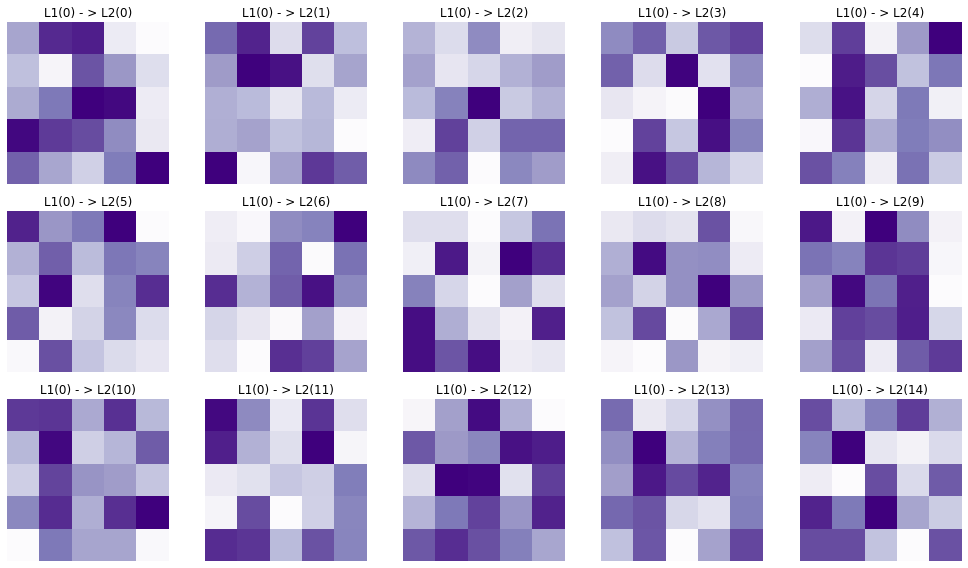

In [18]:
fig, axs = plt.subplots(3, 5, figsize=(14, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(conv.weight[i, 0, :, :]).detach(), cmap="Purples")
    ax.set_title("L1(0) - > L2(%s)"%i)
    ax.axis("off")
plt.tight_layout()
plt.show()

### Convolve with an image

(64, 64, 3, 1)
torch.Size([1, 3, 64, 64])


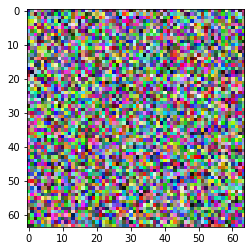

In [24]:
img = torch.rand((1, 3, 64, 64))
view = img.permute(2, 3, 1, 0).numpy()
print(view.shape)
print(img.shape)
plt.imshow(np.squeeze(view));

In [25]:
# Convolve the img
res = conv(img)
print(res.shape)

torch.Size([1, 15, 60, 60])


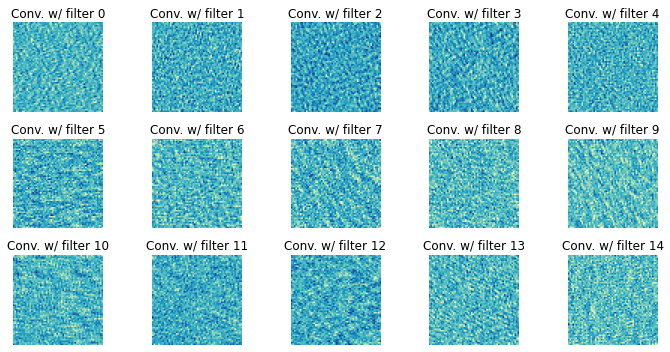

In [31]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):
    to_show = torch.squeeze(res[0, i, :, :]).detach()
    ax.imshow(to_show, cmap="YlGnBu")
    ax.set_title("Conv. w/ filter %s"%i)
    ax.axis("off")
plt.tight_layout()
plt.show()

### Transpose Convolution

* Transpose convolution means to scalar-multiply a kernel by each pixel in an image.
* As long as the kernel size > 1 pixel, the result will be higher resolution than the orginal image.
* Transpose convolution is used for autoencoders and super-resolution CNNs
* Transpose convolution takes the same parameters as "forward" convolution: kernel size, padding, stride, out channels, in channels etc.



![SegmentLocal](imgs/tconv.png "segment")
**Fig 2: kernel size of (3, 3) getting multiplied with a scalar and moving the kernel with stride of size 1 and padding of size 0.**

**Formula for determining the size of transpose Convolution**
![SegmentLocal](imgs/tc_formula.png "segment")

### Max/Avg Pooling
``In MaxPool take the max value among the kernel size from the image matrix``

``In MeanPool mul all the r,c with 0.25 of kernel size and sum them up for the result maxtrix``
![SegmentLocal](imgs/maxMean_pool.png "segment")

### Pooling in pytorch

In [32]:
pool_size = 3
stride = 3

p2d = nn.MaxPool2d(pool_size, stride=stride)
p3d = nn.MaxUnpool3d(pool_size, stride=stride)
p2d, p3d

(MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False),
 MaxUnpool3d(kernel_size=(3, 3, 3), stride=(3, 3, 3), padding=(0, 0, 0)))

### Creating a CNN model

In [39]:
model_1 = nn.Sequential(
    nn.Conv2d(3, 10, 5, 3, 2),
    nn.ReLU(),
    nn.AvgPool3d(3, 3),
    nn.Flatten(),
    nn.Linear(588, 1),
    nn.Sigmoid()
)
model_1

Sequential(
  (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(3, 3), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool3d(kernel_size=3, stride=3, padding=0)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=588, out_features=1, bias=True)
  (5): Sigmoid()
)

In [45]:
img = torch.rand(1, 3, 128, 128)
model_1(img)

tensor([[0.5117]], grad_fn=<SigmoidBackward0>)

### Image transformation

In [47]:
data = torchvision.datasets.CIFAR10(root="cifar10", download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10\cifar-10-python.tar.gz to cifar10


In [48]:
print(data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [52]:
print(data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


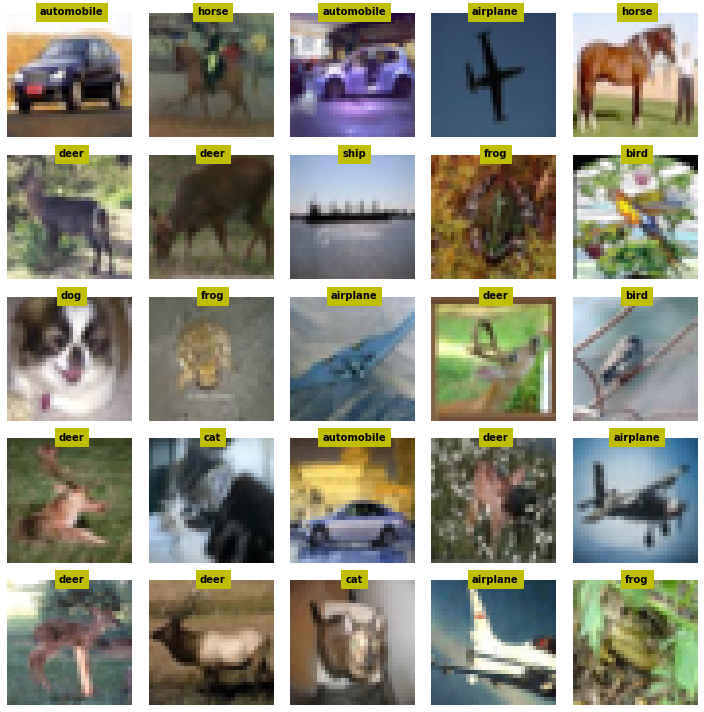

In [55]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i in axs.flatten():
    index = np.random.choice(len(data.targets))
    pic = data.data[index, :, : ,:]
    label = data.classes[data.targets[index]]
    i.imshow(pic)
    i.text(16, 0, label, ha="center", fontweight="bold", color="k",
          backgroundcolor="y")
    i.axis("off")
plt.tight_layout();

In [56]:
ts = T.Compose([T.ToTensor(),
               T.Resize(32 * 4),
               T.Grayscale(num_output_channels=1)])
data.transform = ts

In [57]:
print(data.data[1, :, :, :].shape)

(32, 32, 3)


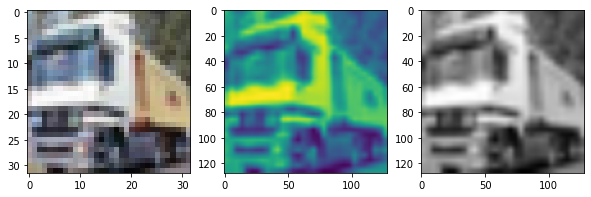

In [58]:
img_1 = ts(data.data[1, : , :, :])
img_2 = data.transform(data.data[1, :, :, :])

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(data.data[1, :, :, :])
ax[1].imshow(torch.squeeze(img_1))
ax[2].imshow(torch.squeeze(img_2), cmap="gray")
plt.show()

### Custom DataLoader

In [80]:
data = pd.read_csv("data/digit-recognizer/train.csv")

In [81]:
data = data.values

In [82]:
data.shape

(42000, 785)

In [83]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
labels = data[:, 0]
data = data[:, 1:]

In [85]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [87]:
data = data / np.max(data)

In [89]:
data = data.reshape(data.shape[0], 1, 28, 28)

In [91]:
data.shape, labels.shape

((42000, 1, 28, 28), (42000,))

In [92]:
ten_data = torch.tensor(data).float()
labels = torch.tensor(labels).long()

In [93]:
ten_data.shape, labels

(torch.Size([42000, 1, 28, 28]), tensor([1, 0, 1,  ..., 7, 6, 9]))

### Creating custom class for the dataset type

In [96]:
# reference
??torch.utils.data.TensorDataset

In [97]:
class CustomDataset(Dataset):
    
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == t.size(0) for t in tensors), "size mismatch between the tensors"
        self.tensors = tensors
        self.transform = transform
    
    def __getitem__(self, index):
        if self.transform:
            x = self.transform(self.tensors[0][index])
        else:
            x = self.tensors[0][index]
        y = self.tensors[1][index]
        return x, y
    
    def __len__(self):
        return self.tensors[0].size(0)

### Applying custom dataset on the Data

In [98]:
t_img = T.Compose([
    T.ToPILImage(),
    T.RandomVerticalFlip(p=0.5),
    T.ToTensor()
])

In [99]:
train_data = CustomDataset((ten_data, labels), t_img)
data_loader = DataLoader(train_data, batch_size=8)

In [106]:
data_loader

## Working on MNIST Dataset with CNNs

### Getting the data ready

In [129]:
data = pd.read_csv("data/digit-recognizer/train.csv").values

In [130]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [131]:
labels = data[:, 0]
data = data[:, 1:]

In [132]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [133]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [134]:
data = torch.tensor(data).float()
labels = torch.tensor(labels).long()

In [138]:
data = data.reshape(data.shape[0], 1, 28, 28)

In [139]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                                                                   test_size=0.1)

In [140]:
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

In [141]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

### Creating CNNs model for MNIST Dataset

In [152]:
def getModel_1(test=False):
    class createModel(nn.Module):
        def __init__(self, test):
            super().__init__()
            self.conv_1 = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=1)
            self.conv_2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=1)
            expected_size = 20 * 25
            self.linear_1 = nn.Linear(expected_size, 50)
            self.output = nn.Linear(50, 10)
            self.test = test
        
        # forward pass
        def forward(self, x):
            if self.test:
                print(f"Input: {x.shape}")
            x = F.relu(F.max_pool2d(self.conv_1(x), 2))
            if self.test:
                print(f"Layer conv_1/maxPool_1: {x.shape}")
            x = F.relu(F.max_pool2d(self.conv_2(x), 2))
            if self.test:
                print(f"Layer conv_2/maxPool_2: {x.shape}")
            if self.test:
                print(f"x numel shape: {x.shape.numel()}, getting to {x.shape[0]}")
            nUnits = x.shape.numel() / x.shape[0]
            x = x.view(-1, int(nUnits))
            if self.test:
                print(f"Vectorize: {x.shape}")
            x = F.relu(self.linear_1(x))
            if self.test:
                print(f"Linear_1: {x.shape}")
            x = self.output(x)
            if self.test:
                print(f"Layer out: {x.shape}")
            return x
    net = createModel(test)
    Loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
    return net, Loss, optimizer

In [153]:
model, Loss, optimizer = getModel_1(True)
x, y = iter(train_loader).next()
yh = model(x)
print(yh.shape)
print(y.shape)
loss = Loss(yh, y)
print("Loss: ", loss)

Input: torch.Size([32, 1, 28, 28])
Layer conv_1/maxPool_1: torch.Size([32, 10, 13, 13])
Layer conv_2/maxPool_2: torch.Size([32, 20, 5, 5])
x numel shape: 16000, getting to 32
Vectorize: torch.Size([32, 500])
Linear_1: torch.Size([32, 50])
Layer out: torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32])
Loss:  tensor(9.1652, grad_fn=<NllLossBackward0>)


In [156]:
def train_model_1(epochs=10):
    train_loss = []
    train_acc = []
    test_acc = []
    model, Loss, optimizer = getModel_1()
    for i in range(epochs):
        batch_loss = []
        batch_acc = []
        for x, y in train_loader:
            yh = model(x)
            loss = Loss(yh, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Computing batch performance
            batch_loss.append(loss.item())
            correct = (torch.argmax(yh, axis=1) == y).float()
            batch_acc.append(100 * torch.mean(correct))
        # train acc
        train_acc.append(np.mean(batch_acc))
        train_loss.append(np.mean(batch_loss))
        # computing test acc
        x, y = next(iter(test_loader))
        with torch.no_grad():
            yh = model(x)
        correct = (torch.argmax(yh, axis=1) == y).float()
        test_acc.append(100 * torch.mean(correct))
        print(f"Train accuracy {train_acc[-1]}, Test Accuracy {test_acc[-1]}")
    return model, train_acc, train_loss, test_acc

In [157]:
model, train_acc, train_loss, test_acc = train_model_1()

Train accuracy 88.91035461425781, Test Accuracy 95.66666412353516
Train accuracy 96.0176773071289, Test Accuracy 96.83332824707031
Train accuracy 97.11843872070312, Test Accuracy 97.23809051513672
Train accuracy 97.67940521240234, Test Accuracy 97.78572082519531
Train accuracy 97.99163818359375, Test Accuracy 97.69047546386719
Train accuracy 98.3488540649414, Test Accuracy 97.57142639160156
Train accuracy 98.56318664550781, Test Accuracy 98.0
Train accuracy 98.74576568603516, Test Accuracy 98.02381134033203
Train accuracy 98.90188598632812, Test Accuracy 98.11904907226562
Train accuracy 98.9627456665039, Test Accuracy 97.80952453613281


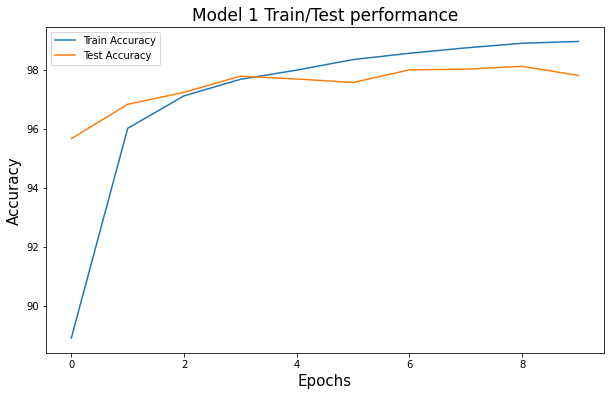

In [166]:
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.legend()
plt.title("Model 1 Train/Test performance", fontdict={"fontsize": 17})
plt.xlabel("Epochs", fontdict={"fontsize": 15})
plt.ylabel("Accuracy", fontdict={"fontsize": 15})
plt.show()

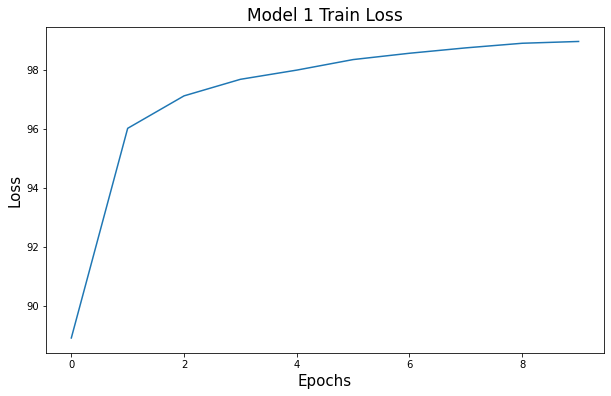

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label="Train Loss")
plt.title("Model 1 Train Loss", fontdict={"fontsize": 17})
plt.xlabel("Epochs", fontdict={"fontsize": 15})
plt.ylabel("Loss", fontdict={"fontsize": 15})
plt.show()

### Examine the feature map activations

### Creating dataset

In [59]:
points = 1000
size = 91

X = np.linspace(-4, 4, size)
x, y = np.meshgrid(X, X)
widths = [1.8, 2.4]
images = torch.zeros(2 * points, 1, size, size)
labels = torch.zeros(2 * points)

for i in range(2 * points):
    res = 2 * np.random.randn(2)
    g = np.exp(-((x - res[0]) ** 2 + (y - res[1]) ** 2) / (2 * widths[i % 2] ** 2))
    g += np.random.randn(size, size) / 5
    images[i, :, :, :] = torch.Tensor(g).view(1, size, size)
    labels[i] = i % 2
labels = labels[:, None]

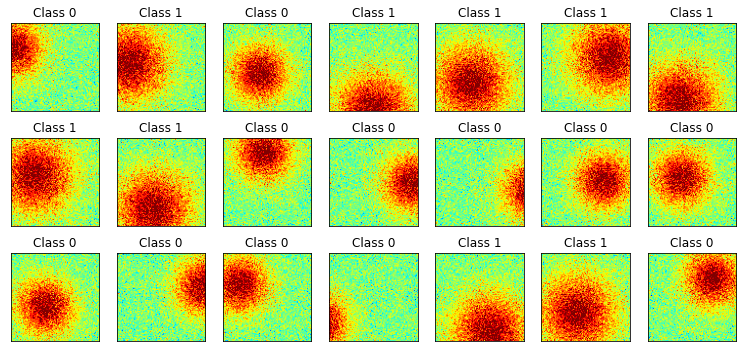

In [61]:
# Visualizing the results
fig, axs = plt.subplots(3, 7, figsize=(13, 6))

for i, ax in enumerate(axs.flatten()):
    select = np.random.randint(2 * points)
    g = np.squeeze(images[select, :, :])
    ax.imshow(g, vmin=-1, vmax=1, cmap="jet")
    ax.set_title("Class %s"%int(labels[select].item()))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Create train/test dataLoaders

In [62]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labels,
                                                                   test_size=0.2)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data,
                         batch_size=32,
                         shuffle=True,
                         drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])


### Creating deep learning model

In [69]:
def examineModel():
    class createModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 6, 3, padding=1)
            # size after pooling = (91 + 2 * 1 - 3 + 1) / 2 = 45
            self.conv2 = nn.Conv2d(6, 4, 3, padding=1)
            # size ((45 + 2 * 1 - 1) + 1) / 2 = 22
            self.linear_1 = nn.Linear(22 * 22 * 4, 50)
            self.linear_2 = nn.Linear(50, 1)
        
        def forward(self, x):
            
            conv1 = F.relu(self.conv1(x))
            x = F.avg_pool2d(conv1, (2, 2))
            
            conv2 = F.relu(self.conv2(x))
            x = F.avg_pool2d(conv2, (2, 2))
            
            x = x.reshape(x.shape[0], -1)
            x = F.relu(self.linear_1(x))
            x = self.linear_2(x)
            
            return x, conv1, conv2
    model = createModel()
    Loss = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    return model, Loss, optimizer

In [70]:
# Testing the model
model, Loss, optimizer = examineModel()
x, y = iter(train_loader).next()
yh, f1, f2 = model(x)
loss = Loss(yh, y)

In [71]:
f1.shape, f2.shape, yh.shape

(torch.Size([32, 6, 91, 91]), torch.Size([32, 4, 45, 45]), torch.Size([32, 1]))

### Creating train model

In [82]:
def train_examine(epochs=15):
    model, Loss, optimizer = examineModel()
    train_loss = []
    test_acc = []
    train_acc = []
    test_loss = []
    for i in range(epochs):
        batch_acc = []
        batch_loss = []
        for x, y in train_loader:
            yh = model(x)[0]
            loss = Loss(yh, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            batch_loss.append(loss.item())
            batch_acc.append(100 * torch.mean(((yh > 0) == y).float()).item())
        train_loss.append(np.mean(batch_loss))
        train_acc.append(np.mean(batch_acc))
        # computing performance on testLoaders
        x, y = next(iter(test_loader))
        with torch.no_grad():
            yh = model(x)[0]
            loss = Loss(yh, y)
        test_loss.append(loss.item())
        test_acc.append(100 * torch.mean(((yh > 0) == y).float()).item())
        print(f"Epoch {i + 1}, Train accuracy: {train_acc[-1]}, Test Accuracy: {test_acc[-1]}")
    return model, train_acc, train_loss, test_acc, test_loss

In [83]:
model, train_acc, train_loss, test_acc, test_loss = train_examine()

Epoch 1, Train accuracy: 64.5, Test Accuracy: 94.74999904632568
Epoch 2, Train accuracy: 94.0, Test Accuracy: 95.99999785423279
Epoch 3, Train accuracy: 95.625, Test Accuracy: 96.24999761581421
Epoch 4, Train accuracy: 96.5625, Test Accuracy: 96.74999713897705
Epoch 5, Train accuracy: 97.4375, Test Accuracy: 97.25000262260437
Epoch 6, Train accuracy: 97.3125, Test Accuracy: 97.50000238418579
Epoch 7, Train accuracy: 98.0, Test Accuracy: 97.50000238418579
Epoch 8, Train accuracy: 97.75, Test Accuracy: 97.75000214576721
Epoch 9, Train accuracy: 98.0, Test Accuracy: 98.00000190734863
Epoch 10, Train accuracy: 98.0625, Test Accuracy: 98.25000166893005
Epoch 11, Train accuracy: 98.375, Test Accuracy: 99.00000095367432
Epoch 12, Train accuracy: 98.25, Test Accuracy: 98.7500011920929
Epoch 13, Train accuracy: 98.4375, Test Accuracy: 99.00000095367432
Epoch 14, Train accuracy: 98.375, Test Accuracy: 98.50000143051147
Epoch 15, Train accuracy: 98.5, Test Accuracy: 98.50000143051147


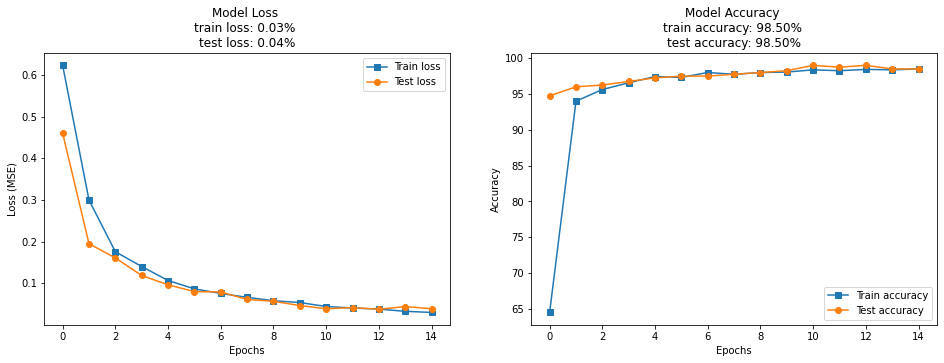

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(train_loss, "s-", label="Train loss")
ax[0].plot(test_loss, "o-", label="Test loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss (MSE)")
ax[0].set_title(f"Model Loss \ntrain loss: {train_loss[-1]:.2f}% \ntest loss: {test_loss[-1]:.2f}%")
ax[0].legend()

ax[1].plot(train_acc, "s-", label="Train accuracy")
ax[1].plot(test_acc, "o-", label="Test accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title(f"Model Accuracy \ntrain accuracy: {train_acc[-1]:.2f}% \ntest accuracy: {test_acc[-1]:.2f}%")
ax[1].legend()

plt.show()

### Visualizing some resulted images

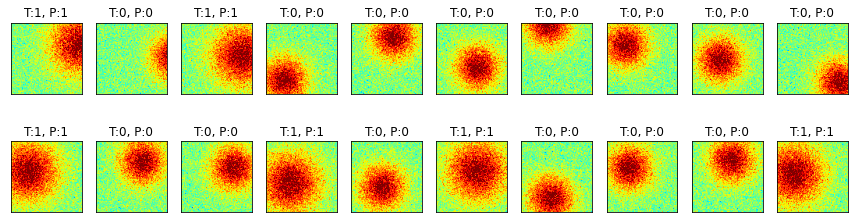

In [86]:
x, y = next(iter(test_loader))
yh, f1, f2 = model(x)

fig, axs = plt.subplots(2, 10, figsize=(15, 4))
for i, ax in enumerate(axs.flatten()):
    g = torch.squeeze(x[i, 0, :, :]).detach()
    ax.imshow(g, vmin=-1, vmax=1, cmap='jet')
    t = (int(y[i].item()), int(yh[i].item() > .5))
    ax.set_title(("T:%s, P:%s")%t)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Visualizing feature maps

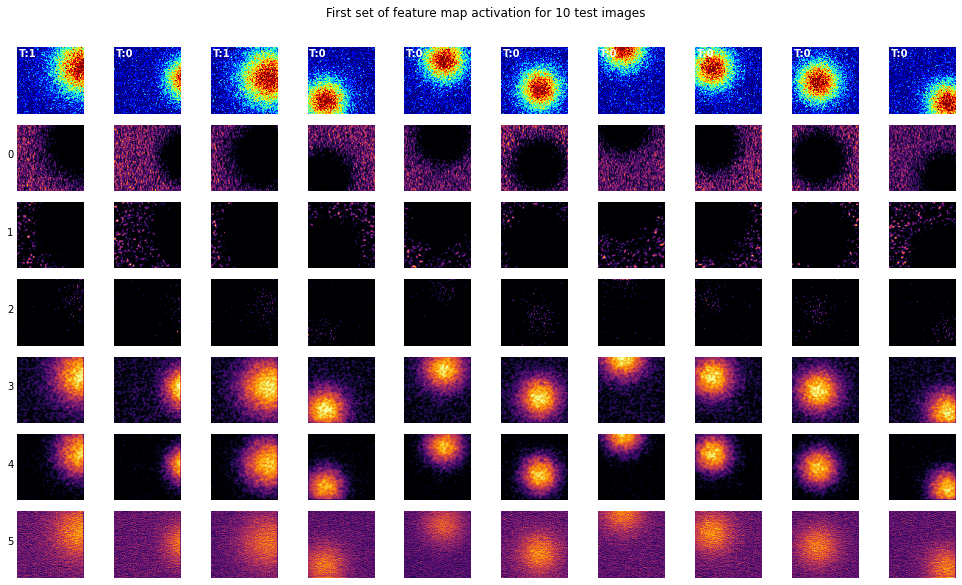

In [90]:
fig, axs = plt.subplots(7, 10, figsize=(14, 8))

for i in range(10):
    img = x[i, 0, :, :].detach()
    axs[0, i].imshow(img, cmap="jet", vmin=0, vmax=1)
    axs[0, i].axis("off")
    axs[0, i].text(2, 2, "T:%s"%int(y[i].item()), ha="left", va="top",
                  color="w", fontweight="bold")
    for j in range(6):
        img = f1[i, j, :, :].detach()
        axs[j + 1, i].imshow(img, cmap="inferno", vmin=0, vmax=torch.max(img) * .9)
        axs[j + 1, i].axis("off")
        axs[j + 1, i].text(-5, 45, j, ha="right") if i == 0 else None
    plt.tight_layout()
    plt.suptitle("First set of feature map activation for 10 test images",
                x=.5, y=1.01)
plt.show()